## **Simulación de generación de residuos**


In [12]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

### **Datos usados para la simulación**

1. **Dataset del crecimiento poblacion para el AMB según proyecciones del DANE**

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/DavidGD03/plastics-COVID_project/main/data/crecimiento_poblacional.csv')
df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Crecimiento de la población (% anual),SP.POP.GROW,Area Metropolitana de Bucaramanga,AMB,1.967944,1.603752,1.711657,1.634875,1.591093,1.536012,1.534453,1.65298,1.783404,2.246706,3.04802,2.368886


2. **Dataset del Banco Mundial sobre la composición de los desechos en Colombia**

In [34]:
df2 = pd.read_csv('https://raw.githubusercontent.com/DavidGD03/plastics-COVID_project/main/data/tasa_residuos.csv')
df2_filtro = df2[df2["country_name"] == 'Colombia']
df2_filtro = df2_filtro.dropna(axis=1)
df2_filtro

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,other_information_information_system_for_solid_waste_management,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,population_population_number_of_people,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_urban_percent_of_households,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent
41,COL,LCN,Colombia,UMC,3.664567e+11,59.58,2.35,1.1,15.74,8.4,12.83,Yes,No,Yes,46406646.0,252200.0,270146.3,27704.0,12150120.0,24.1,80.6,97.4,4.0,17.2,89.0


3. **Datos de toneladas totales y aprovechables en el AMB desde 2016 hasta 2021 según el SUI**

In [36]:
ton_aprov_mes = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/ton_aprov_mes.xlsx?raw=true')
ton_tot_mes = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/ton_totales_mes.xlsx?raw=true')
ton_aprov_mes=ton_aprov_mes.set_index(['MES'])
ton_tot_mes=ton_tot_mes.set_index(['MES'])
ton_tot_mes

,2016,2017,2018,2019,2020,2021
MES,,,,,,
ENERO,NaN,28771.3300,30981.4948,31100.86180,30129.43610,30067.7040
FEBRERO,NaN,26387.1960,26865.1199,29710.48475,27257.11660,28363.3047
MARZO,NaN,30237.2635,28941.2470,29595.75020,29869.77820,31564.4753
ABRIL,28660.38824,28035.9690,29586.7617,24576.15560,28621.40630,NaN
MAYO,29609.78475,31626.7240,31036.5410,27785.50520,30176.91630,NaN
JUNIO,27711.16225,29659.8255,29415.3915,29563.62970,28383.73320,NaN
JULIO,27566.42750,30322.8470,30339.1820,31518.27600,29671.56600,NaN
AGOSTO,29702.94950,30845.7880,30515.0387,30615.05550,29644.05675,NaN
SEPTIEMBRE,28573.38050,29502.0140,29187.9172,31056.52000,28593.74795,NaN


In [49]:
ton_ac=[]
for i in range(12):
  ton_ac.append(ton_tot_mes.iloc[i].dropna().mean())

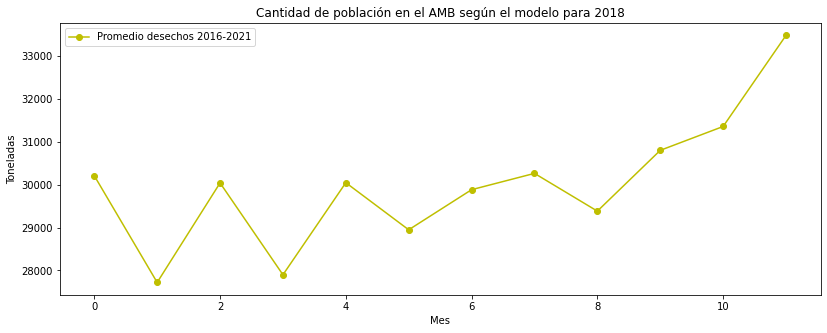

In [51]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(ton_ac,label='Promedio desechos 2016-2021',marker='o',color='y');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Toneladas');
ax.title.set_text('Cantidad de población en el AMB según el modelo para 2018')
#ax.set_ylim(ymin=1170000,ymax=1200000)
plt.show()

### **Definición de variables**

**Variables:**

- Pop= cantidad total de habitantes en el AMB

- WGR= Tasa de generacion de residos per capita

- n= Año de la simulación

- pgr= Tasa de crecimiento poblacional obtenido de manera aleatoria
- wggr= Tasa de crecimiento de generación de residuos obtenido de manera aleatoria







In [17]:
# Usaremos solo ciertos años del dataset de tasa crecimiento poblacional en el AMB
df3=df.iloc[:,11:15]
df3_T = df3.T
df3_p=(df3_T/100)/12
df3_p

,0
2016 [YR2016],0.001377
2017 [YR2017],0.001486
2018 [YR2018],0.001872
2019 [YR2019],0.002540


In [18]:
# calculamos la tasa de residuos per cápita dividiendo las toneladas totales por mes entre la cantidad de habitantes de ese año

from sklearn import linear_model

lista,lista2,lista3,lista4,newList,newList2,newList3,newList4=[],[],[],[],[],[],[],[]
lista=np.append(lista,ton_tot_mes[2016].values.tolist())
newList = [x / 1157001 for x in lista]
lista2=np.append(lista2,ton_tot_mes[2017].values.tolist())
cleanlist = [x for x in lista2 if str(x) != 'nan']
newList2 = [x / 1177635 for x in cleanlist]
#lista3=np.append(lista3,ton_tot_mes[2018].values.tolist())
#newList3 = [x / 1204093 for x in lista3]
#lista4=np.append(lista4,ton_tot_mes[2019].values.tolist())
#cleanlist = [x for x in lista4 if str(x) != 'nan']
#newList4 = [x / 1240794 for x in cleanlist]

#newList += newList2+newList3+newList4
newList += newList2
df_ton = pd.DataFrame(newList)
df_ton=df_ton.pct_change()
#df_ton=df_ton.dropna()
df_ton=df_ton.fillna(df_ton.mean())

In [24]:
def sim_generacion(meses,N):
  PopInitial=1157001 # DANE - población AMB en 2016
  porcentaje_plastic=0.128 # porcentaje de plástico según banco mundial
  WGRInitial=0.033126 # tasa de crecimiento de residuos 2016
  pgr_min=df3_p.min().values[0]
  pgr_max=df3_p.max().values[0]
  wggr_max=df_ton.max().values[0]
  wggr_min=df_ton.min().values[0]
  pred_pop,pred_wgr,pred_WQ,pred_pgr = [],[],[],[]

  for i in range(meses):
      delta_pgr = df3_p.sample(1).values[0] # muestra aleatoria del dataframe de tasa de crecimiento poblacional mensual desde 2016-2017
      delta_wggr= df_ton.sample(1).values[0] # muestra aleatoria del dataframe de tasa de crecimiento de residuos mensual desde abril 2016 hasta marzo 2017
      pgr=pgr_min+(pgr_max-pgr_min)*delta_pgr # aplicamos fórmula del paper
      wggr=wggr_min+(wggr_max-wggr_min)*delta_wggr
      pop=PopInitial*(1+pgr)**N
      wgr=WGRInitial*(1+wggr)**N
      WQ = (pop * wgr)
      PopInitial=pop
      #WGRInitial=wgr
      pred_pgr.append(pgr)
      pred_pop.append(pop) # predicciones población
      pred_wgr.append(wgr) # predicciones tasa residuos
      pred_WQ.append(WQ) # predicciones desechos
  return pred_pop,pred_wgr,pred_WQ,pred_pgr

In [21]:
#sim_generacion(12,2)
#wq_plastic=WQ*porcentaje_plastic #cantidad de toneladas de plástico por día
#print("La cantidad de toneladas de plástico por mes en el AMB es de ",wq_plastic)

### **Resultados del Modelo**

In [26]:
pred_pop100sd,pred_wgr100sd,pred_WQ100sd,pred_pgr100sd=[],[],[],[]

pred_pop100=np.zeros((12, 1))
pred_wgr100=np.zeros((12, 1))
pred_pgr100=np.zeros((12, 1))
pred_WQ100=np.zeros((12, 1))
iter=10
for i in range(iter):
  pred_pop2,pred_wgr2,pred_WQ2,pred_pgr2=[],[],[],[]
  pred_pop2,pred_wgr2,pred_WQ2,pred_pgr2=sim_generacion(12,2) #simulación para 12 meses

  pred_pop100sd.append(pred_pop2)
  pred_wgr100sd.append(pred_wgr2)
  pred_pgr100sd.append(pred_pgr2)
  pred_WQ100sd.append(pred_WQ2)
  
  pred_pop100=np.add(pred_pop100, pred_pop2)
  pred_wgr100=np.add(pred_wgr100, pred_wgr2)
  pred_pgr100=np.add(pred_pgr100, pred_pgr2)
  pred_WQ100=np.add(pred_WQ100, pred_WQ2) 


pred_pop100=pred_pop100/iter
pred_wgr100=pred_wgr100/iter
pred_pgr100=pred_pgr100/iter
pred_WQ100=pred_WQ100/iter
pred_pop_df=pd.DataFrame(pred_pop100,columns =['2018'],index=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']) #población
pred_pgr_df=pd.DataFrame(pred_pgr100,columns =['2018'],index=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']) #tasa crecimiento de población
pred_wgr_df=pd.DataFrame(pred_wgr100,columns =['2018'],index=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']) #tasa residuos per cápita
pred_wq_df=pd.DataFrame(pred_WQ100,columns =['2018'],index=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']) #desechos totales

In [27]:
# Desviación estándar
def sd_modelo(pred_sd):
  sd2=[]
  df_sd=pd.DataFrame(pred_sd)
  for i in range(12):
    sd2v=np.std(df_sd[i])
    sd2.append(sd2v)
  return sd2

std_pop=sd_modelo(pred_pop100sd)
std_wgr=sd_modelo(pred_wgr100sd)
std_wq=sd_modelo(pred_WQ100sd)
std_pgr=sd_modelo(pred_pgr100sd)

No handles with labels found to put in legend.


(0.0, 40000.0)

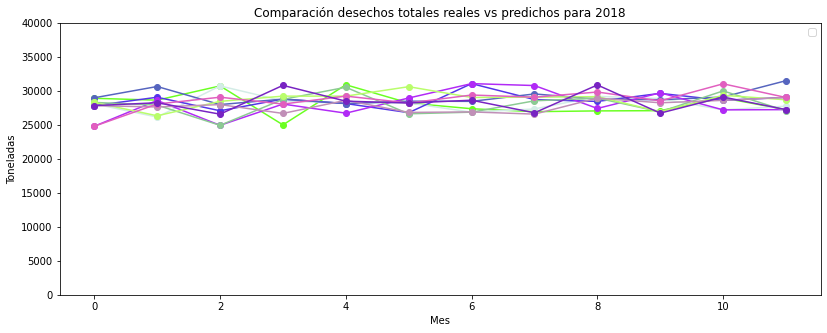

In [28]:
# Comportamiento prediccion para las iteraciones
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
for i in range(iter):
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  #label='Iteración',i+1
  ax.plot(pred_WQ100sd[i],marker='o',color=color);
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Toneladas');
ax.title.set_text('Comparación desechos totales reales vs predichos para 2018')
ax.set_ylim(ymin=0,ymax=40000)

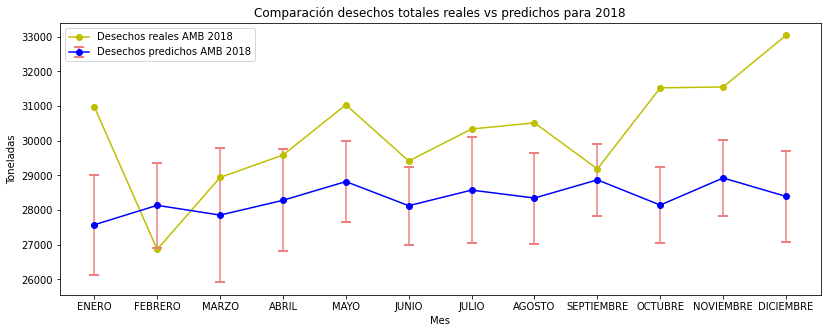

In [29]:
# Comportamiento prediccion
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(ton_tot_mes[2018],label='Desechos reales AMB 2018',marker='o',color='y');
#ax.plot(pred_wq_df,label='Desechos modelo AMB 2018',marker='o',color='b');
ax.errorbar(pred_wq_df.index,pred_wq_df['2018'],yerr=std_wq,label='Desechos predichos AMB 2018',capthick=2,capsize=5,ecolor="LightCoral", marker='o' ,color='b');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Toneladas');
ax.title.set_text('Comparación desechos totales reales vs predichos para 2018')
#ax.set_ylim(ymin=0,ymax=35000)

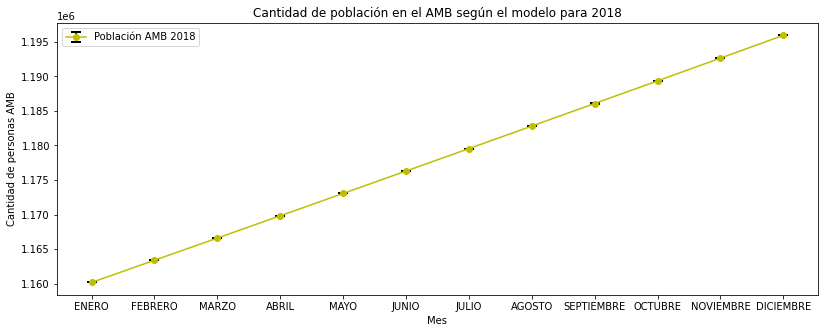

In [30]:
# Comportamiento poblacion
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.errorbar(pred_pop_df.index,pred_pop_df['2018'],yerr=std_pop,label='Población AMB 2018',capthick=2,capsize=5,ecolor="Black", marker='o' ,color='y');
#ax.plot(pred_pop_df,label='Población AMB 2018',marker='o' ,color='y');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Cantidad de personas AMB');
ax.title.set_text('Cantidad de población en el AMB según el modelo para 2018')
#ax.set_ylim(ymin=1170000,ymax=1200000)
plt.show()

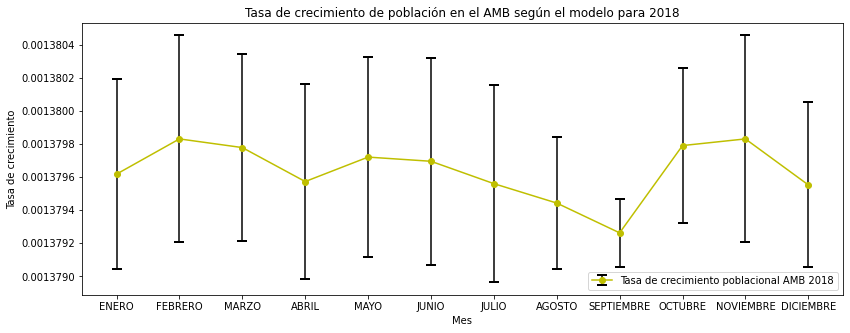

In [31]:
# Comportamiento tasa de crecimiento poblacional
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.errorbar(pred_pgr_df.index,pred_pgr_df['2018'],yerr=std_pgr,label='Tasa de crecimiento poblacional AMB 2018',capthick=2,capsize=5,ecolor="Black", marker='o' ,color='y');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Tasa de crecimiento');
ax.title.set_text('Tasa de crecimiento de población en el AMB según el modelo para 2018')
#ax.set_ylim(ymin=1170000,ymax=1200000)
plt.show()

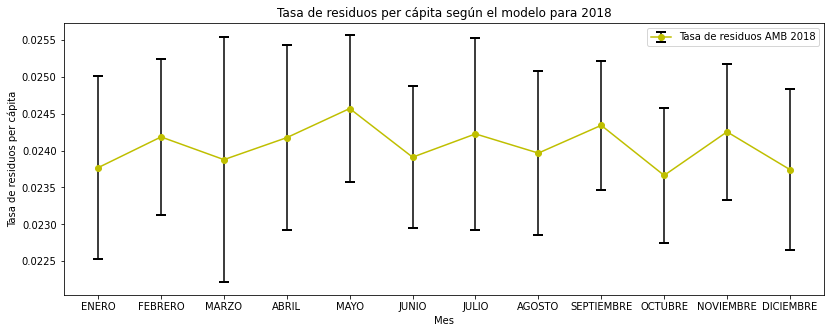

In [33]:
# Comportamiento tasa residuos
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.errorbar(pred_wgr_df.index,pred_wgr_df['2018'],yerr=std_wgr,label='Tasa de residuos AMB 2018',capthick=2,capsize=5,ecolor="Black", marker='o' ,color='y');
ax.legend();
ax.set_xlabel('Mes');
ax.set_ylabel('Tasa de residuos per cápita');
ax.title.set_text('Tasa de residuos per cápita según el modelo para 2018')
#ax.set_ylim(ymin=0,ymax=0.04)

## **Datos reales del AMB**

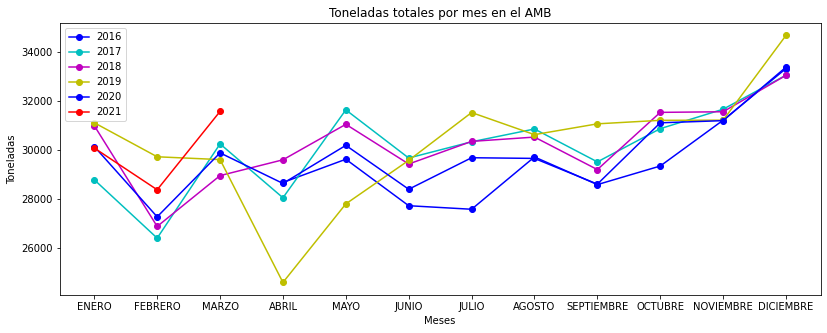

In [40]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(ton_tot_mes[2016],label='2016',marker='o',color='b');
ax.plot(ton_tot_mes[2017],label='2017',marker='o',color='c');
ax.plot(ton_tot_mes[2018],label='2018',marker='o',color='m');
ax.plot(ton_tot_mes[2019],label='2019',marker='o',color='y');
ax.plot(ton_tot_mes[2020],label='2020',marker='o',color='b');
ax.plot(ton_tot_mes[2021],label='2021',marker='o',color='r');
ax.legend();
ax.set_xlabel('Meses');
ax.set_ylabel('Toneladas');
ax.title.set_text('Toneladas totales por mes en el AMB')

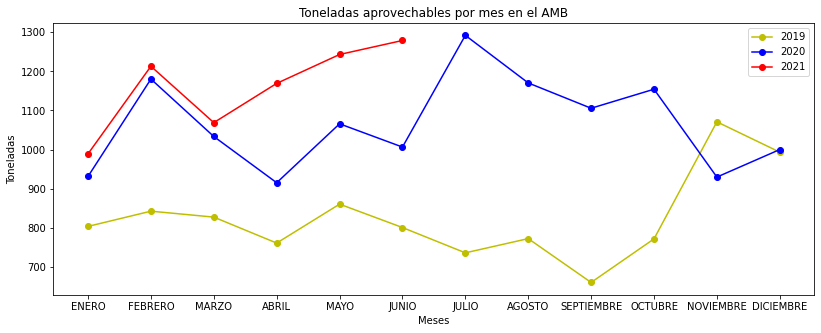

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(ton_aprov_mes[2019],label='2019',marker='o',color='y');
ax.plot(ton_aprov_mes[2020],label='2020',marker='o',color='b');
ax.plot(ton_aprov_mes[2021],label='2021',marker='o',color='r');
#ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Meses');
ax.set_ylabel('Toneladas');
ax.title.set_text('Toneladas aprovechables por mes en el AMB')

El porcentaje de desechos aprovechables sobre los totales es de un 2.5 a un 4%.

La huella plástica se define como la masa total de residuos de plástico utilizada para un proceso, producto o servicio menos la cantidad de plástico evitada, reutilizada, reciclada o reprocesada. 

En este caso supondremos que de las toneladas totales el 12.8% es plástico (Banco Mundial) y de las toneladas aprovechables (las cuales son recicladas) el plástico sólo corresponde a un 10% (de acuerdo a datos de la cooperativa Bello Renacer).

In [ ]:
ton_tot_dia=1000 # promedio de toneladas totales al día en el AMB
ton_plastico_dia=ton_tot_dia*0.128 # calculamos cuánto plástico hay en esas toneladas totales
ton_aprov_dia=30 # promedio de toneladas aprovechadas al día en el AMB
ton_aprov_plastico_dia=ton_aprov_dia*0.1 # calculamos cuánto plástico hay en esas toneladas aprovechables (las cuales son recicladas)

huella_plastica=ton_plastico_dia-ton_aprov_plastico_dia # le restamos las toneladas recicladas a las totales para hallar la huella plástica
print("Las toneladas de plástico totales generadas por día son",ton_plastico_dia)
print("Las toneladas de plástico reciclado por día son",ton_aprov_plastico_dia)
print("La huella plástica son de",huella_plastica,"toneladas de plástico al día.")

Las toneladas de plástico totales generadas por día son 128.0
Las toneladas de plástico reciclado por día son 3.0
La huella plástica son de 125.0 toneladas de plástico al día.


# Datos Bello Renacer



In [ ]:
ton_bello_renacer = pd.read_excel('https://github.com/DavidGD03/plastics-COVID_project/blob/main/data/toneladas%20bello%20renacer.xlsx?raw=true')
ton_bello_renacer=ton_bello_renacer.set_index(['MES'])

In [ ]:
ton_bello_renacer.head(12)

,2019,2020
MES,,
ENERO,4.25,6.19
FEBRERO,5.71,5.88
MARZO,3.47,7.76
ABRIL,5.03,6.63
MAYO,7.32,6.59
JUNIO,4.38,6.78
JULIO,7.85,6.00
AGOSTO,7.28,7.00
SEPTIEMBRE,7.20,7.00


In [ ]:
#@title **Antes del covid**
#print(ton_bello_renacer[2020].iloc[[0,1]])
#print(ton_bello_renacer[2019].iloc[[8,9,10,11]])

#enero y febrero 2020
df_bello_BeforeCovid=pd.DataFrame(ton_bello_renacer[2020].iloc[[0,1]])

#cambio de nombre de columnas para unificar columna
df_bello_BeforeCovid.rename(columns={2020:'toneladas'},
               inplace=True)

#meses de septiembre a diciembre 2019
df_bello_BeforeCovid2=pd.DataFrame(ton_bello_renacer[2019].iloc[[8,9,10,11]])

#cambio de nombre de columnas para unificar columna
df_bello_BeforeCovid2.rename(columns={2019:'toneladas'},
               index={'SEPTIEMBRE':'SEPTIEMBRE2019','OCTUBRE':'OCTUBRE2019','NOVIEMBRE': 'NOVIEMBRE2019', 'DICIEMBRE': 'DICIEMBRE2019'},
               inplace=True)
df_bello_BeforeCovid=pd.concat([df_bello_BeforeCovid2,df_bello_BeforeCovid])
#6 meses anteriores a marzo de 2020 que es llegada de covid
df_bello_BeforeCovid


,toneladas
MES,
SEPTIEMBRE2019,7.20
OCTUBRE2019,7.30
NOVIEMBRE2019,15.59
DICIEMBRE2019,6.83
ENERO,6.19
FEBRERO,5.88


In [ ]:
#@title **Despues del covid**


#print(ton_bello_renacer[2020].iloc[[2,3,4,5,6,7,8]])
df_bello_AfterCovid=pd.DataFrame(ton_bello_renacer[2020].iloc[[2,3,4,5,6,7,8]])
df_bello_AfterCovid.rename(columns={2020:'toneladas'},
               inplace=True)

df_bello_AfterCovid


,toneladas
MES,
MARZO,7.76
ABRIL,6.63
MAYO,6.59
JUNIO,6.78
JULIO,6.00
AGOSTO,7.00
SEPTIEMBRE,7.00


In [ ]:
#@title **Antes y Despues del covid**


df_bello_ByA=pd.concat([df_bello_BeforeCovid,df_bello_AfterCovid])
df_bello_ByA

,toneladas
MES,
SEPTIEMBRE2019,7.20
OCTUBRE2019,7.30
NOVIEMBRE2019,15.59
DICIEMBRE2019,6.83
ENERO,6.19
FEBRERO,5.88
MARZO,7.76
ABRIL,6.63
MAYO,6.59


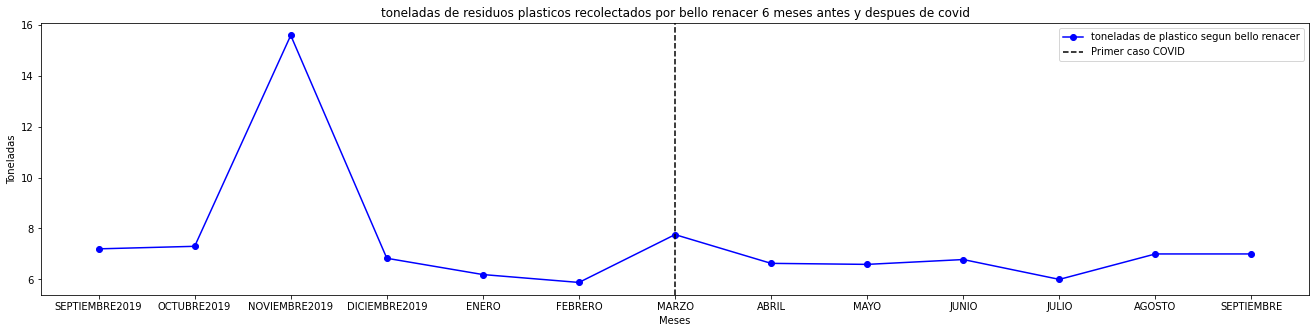

In [ ]:
#@title **Visualización de datos de bello renacer 6 meses antes y después del primer caso COVID**
fig = plt.figure(figsize=(50,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(df_bello_ByA,label='toneladas de plastico segun bello renacer',marker='o',color='b');
plt.axvline(x='MARZO', color='k', linestyle="--",label="Primer caso COVID" )
ax.legend();
ax.set_xlabel('Meses');
ax.set_ylabel('Toneladas');
ax.title.set_text('toneladas de residuos plasticos recolectados por bello renacer 6 meses antes y despues de covid')

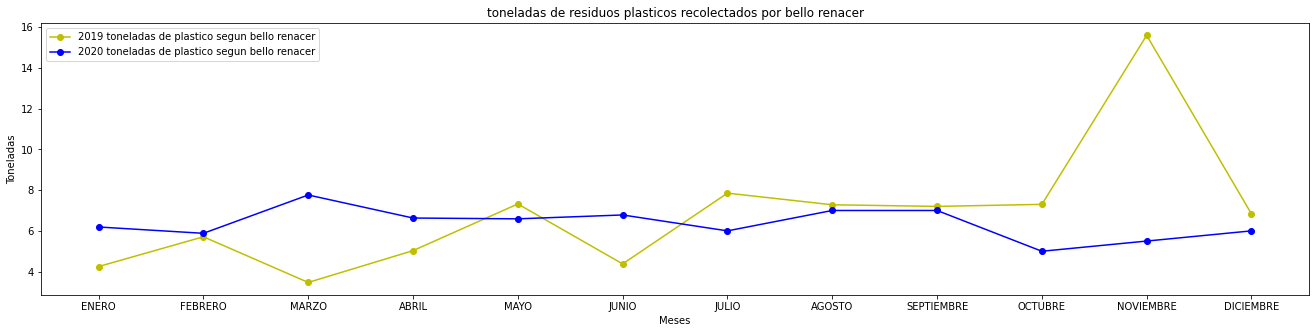

In [ ]:
#@title **Visualización de datos de bello año 2019 y 2020**
fig = plt.figure(figsize=(50,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(ton_bello_renacer[2019],label='2019 toneladas de plastico segun bello renacer',marker='o',color='y');
ax.plot(ton_bello_renacer[2020],label='2020 toneladas de plastico segun bello renacer',marker='o',color='b');
ax.legend();
ax.set_xlabel('Meses');
ax.set_ylabel('Toneladas');
ax.title.set_text('toneladas de residuos plasticos recolectados por bello renacer')

**Fuentes:** 
- Publicación información reportada al SUI, para cálculo de la tarifa de aprovechamiento como actividad complementaria del servicio público de aseo. En línea: http://www.sui.gov.co/web/noticias/10.08.2021.-publicacion-informacion-reportada-al-sui-para-calculo-de-la-tarifa-de-aprovechamiento-como-actividad-complementaria-del-servicio-publico-de-aseo

- Indicadores Cooperativa de Recicladores Bello Renacer http://www.recicladoresbellorenacer.com/indicadores-1/ 

# Emisiones

## **Emisiones por la generación y desecho del plástico**

### Transferencia de Beneficios

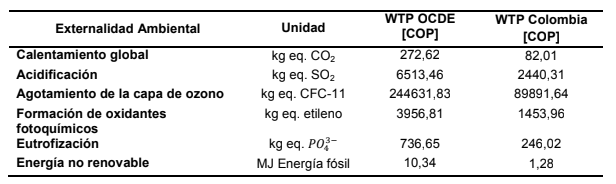

In [ ]:
WTP_Ref=272 # depende de la externalidad y el costo de la OCDE

GDP_COL=14994*3800 # GDP PPP de Colombia para 2020 según la OCDE

GDP_Ref=155250 # cálculo aproximado según tesis Diego

WTP_COL=(WTP_Ref*GDP_COL)/GDP_Ref

GDP PPP Colombia: https://stats.oecd.org/index.aspx?queryid=61433

### Factores de emisión para el plástico

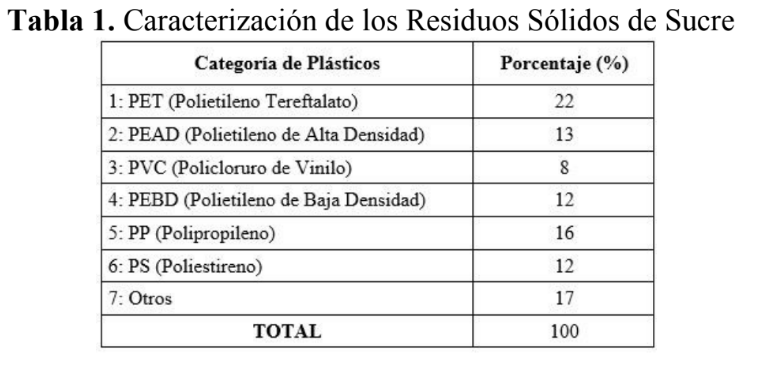

**Fuente:** Generación de combustibles Líquidos a partir de residuos plásticos. En línea: http://www.scielo.org.bo/scielo.php?script=sci_arttext&pid=S2225-87872015000100005

In [ ]:
# porcentajes de residuos sólidos de Sucre
pet=0.22 # polietileno tereftalato
pe=0.25 # polietileno de alta y baja densidad
pp=0.16 # polipropileno
ps=0.12 # poliestireno
pvc=0.08 # policloruro de vinilo

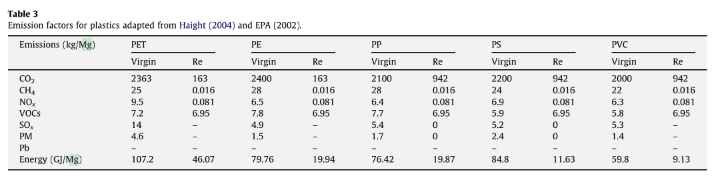

In [ ]:
#dióxido de carbono CO2
CO2_pet=pet*wq_plastic*2363
CO2_pe=pe*wq_plastic*2400
CO2_pp=pp*wq_plastic*2100
CO2_ps=ps*wq_plastic*2200
CO2_pvc=pvc*wq_plastic*2000

CO2_total=CO2_pet+CO2_pe+CO2_pp+CO2_ps+CO2_pvc
#1 Mg es igual a 1 tonelada
print("Cantidad de CO2 (Mg) por día generado por PET: ",CO2_pet)
print("Cantidad de CO2 (Mg) por día generado por PE: ",CO2_pe)
print("Cantidad de CO2 (Mg) por día generado por PP: ",CO2_pp)
print("Cantidad de CO2 (Mg) por día generado por PS: ",CO2_ps)
print("Cantidad de CO2 (Mg) por día generado por PVC: ",CO2_pvc)
print("Cantidad de CO2 (Mg) por día generado en total: ", CO2_total)

NameError: ignored

In [ ]:
#metano CH4
CH4_pet=pet*wq_plastic*25
CH4_pe=pe*wq_plastic*28
CH4_pp=pp*wq_plastic*28
CH4_ps=ps*wq_plastic*24
CH4_pvc=pvc*wq_plastic*22

CH4_total=CH4_pet+CH4_pe+CH4_pp+CH4_ps+CH4_pvc

print("Cantidad de CH4 (Mg) por día generado por PET: ",CH4_pet)
print("Cantidad de CH4 (Mg) por día generado por PE: ",CH4_pe)
print("Cantidad de CH4 (Mg) por día generado por PP: ",CH4_pp)
print("Cantidad de CH4 (Mg) por día generado por PS: ",CH4_ps)
print("Cantidad de CH4 (Mg) por día generado por PVC: ",CH4_pvc)
print("Cantidad de CH4 (Mg) por día generado en total: ", CH4_total)

In [ ]:
#Óxidos de nitrógeno NO
NO_pet=pet*wq_plastic*9.5
NO_pe=pe*wq_plastic*6.5
NO_pp=pp*wq_plastic*6.4
NO_ps=ps*wq_plastic*6.9
NO_pvc=pvc*wq_plastic*6.3

NO_total=NO_pet+NO_pe+NO_pp+NO_ps+NO_pvc

print("Cantidad de NO (Mg) por día generado por PET: ",NO_pet)
print("Cantidad de NO (Mg) por día generado por PE: ",NO_pe)
print("Cantidad de NO (Mg) por día generado por PP: ",NO_pp)
print("Cantidad de NO (Mg) por día generado por PS: ",NO_ps)
print("Cantidad de NO (Mg) por día generado por PVC: ",NO_pvc)
print("Cantidad de NO (Mg) por día generado en total: ", NO_total)

In [ ]:
#Óxido de azufre SO
SO_pet=pet*wq_plastic*9.5
SO_pe=pe*wq_plastic*6.5
SO_pp=pp*wq_plastic*6.4
SO_ps=ps*wq_plastic*6.9
SO_pvc=pvc*wq_plastic*6.3

SO_total=SO_pet+SO_pe+SO_pp+SO_ps+SO_pvc

print("Cantidad de SO (Mg) por día generado por PET: ",SO_pet)
print("Cantidad de SO (Mg) por día generado por PE: ",SO_pe)
print("Cantidad de SO (Mg) por día generado por PP: ",SO_pp)
print("Cantidad de SO (Mg) por día generado por PS: ",SO_ps)
print("Cantidad de SO (Mg) por día generado por PVC: ",SO_pvc)
print("Cantidad de SO (Mg) por día generado en total: ", SO_total)

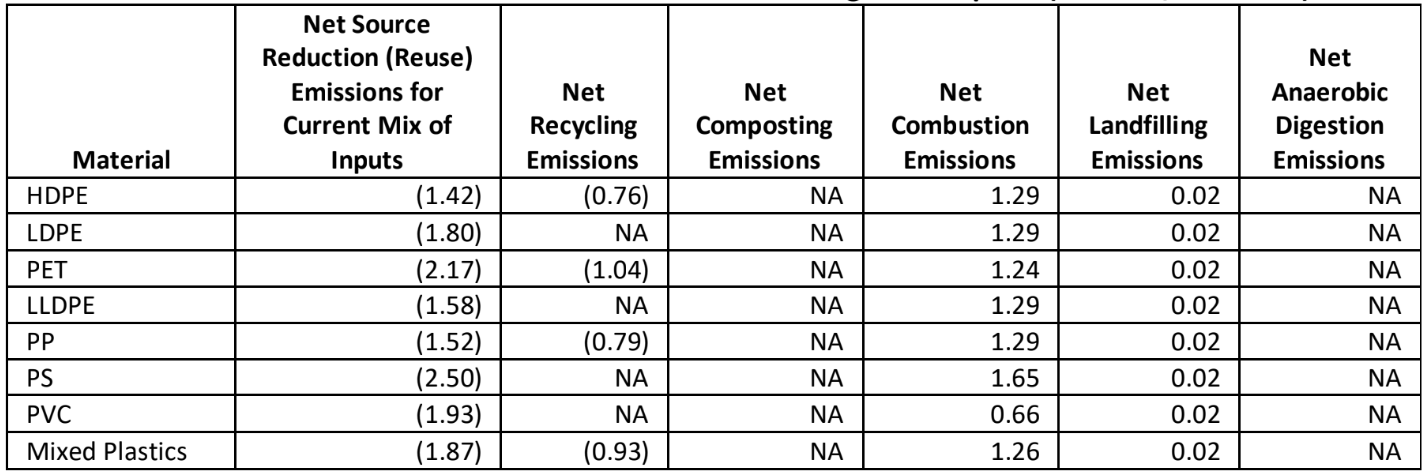

**Fuente:** Documentación de los factores de emisión de gases de efecto invernadero y energía utilizados en el modelo de reducción de residuos (WARM). Noviembre 2020. Oficina de Conservación y Recuperación de Recursos de la Agencia de Protección Medioambiental de EE.UU. En línea: https://www.epa.gov/sites/default/files/2020-12/documents/warm_containers_packaging_and_non-durable_goods_materials_v15_10-29-2020.pdf

In [ ]:
em_landfill=(0.02*10**6)/907 # para convertir Millones de toneladas CO2E/shortTon por Toneladas de CO2 por kilo

wq_em_landfill=em_landfill*wq_plastic

print("Cantidad de toneladas de CO2 por día generadas en total al usar landfill:",wq_em_landfill)

# **Simulación del modelo SEIR**



In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = "notebook"
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [ ]:
def ode_model(z, t, beta, sigma, gamma):
    """
    Reference https://www.idmod.org/docs/hiv/model-seir.html
    """
    S, E, I, R = z
    N = S + E + I + R
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I
    dRdt = gamma*I
    return [dSdt, dEdt, dIdt, dRdt]

In [ ]:
def ode_solver(t, initial_conditions, params):
    initE, initI, initR, initN = initial_conditions
    beta, sigma, gamma = params
    initS = initN - (initE + initI + initR)
    res = odeint(ode_model, [initS, initE, initI, initR], t, args=(beta, sigma, gamma))
    return res

In [ ]:
# ref: https://www.medrxiv.org/content/10.1101/2020.04.01.20049825v1.full.pdf


'''#colombia
initN = 26128023
# S0 = 966000000
initE = 1
initI = 2776
initR = 270
sigma = 1/14
gamma = 1/5.8
R0 = 2.68
beta = R0 * gamma
days = 200
'''
#initN = 599106    Poblacion Bucaramanga
initN  = 1270187 #Poblacion AMB 2020

initE = 1
initI = 1
initR = 0
sigma = 1/14
gamma = 1/5.8


R0 = 2.28
beta = R0 * gamma
days = 320

In [ ]:
def main(initE, initI, initR, initN, beta, sigma, gamma, days):
    initial_conditions = [initE, initI, initR, initN]
    params = [beta, sigma, gamma]
    tspan = np.arange(0, days, 1)
    sol = ode_solver(tspan, initial_conditions, params)
    S, E, I, R = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]
    
    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tspan, y=S, mode='lines+markers', name='Susceptible'))
    fig.add_trace(go.Scatter(x=tspan, y=E, mode='lines+markers', name='Exposed'))
    fig.add_trace(go.Scatter(x=tspan, y=I, mode='lines+markers', name='Infected'))
    fig.add_trace(go.Scatter(x=tspan, y=R, mode='lines+markers',name='Recovered'))
    
    if days <= 30:
        step = 1
    elif days <= 90:
        step = 7
    else:
        step = 30
    
    # Edit the layout
    fig.update_layout(title='Simulation of SEIR Model',
                       xaxis_title='Day',
                       yaxis_title='Counts',
                       title_x=0.5,
                      width=900, height=600
                     )
    fig.update_xaxes(tickangle=-90, tickformat = None, tickmode='array', tickvals=np.arange(0, days + 1, step))
    if not os.path.exists("images"):
        os.mkdir("images")
    fig.write_image("images/seir_simulation.png")
    fig.show(renderer="colab")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Proyecto-Residuos-COVID-AMB/Implementacion/casos_positivos_AMB.csv") #casos COVID en el AMB
df2 = df.rename(columns={"Fecha de diagnóstico" : "fecha"})
df2['fecha'] = df2['fecha'].str.replace(' 0:00:00', '')
df2['fecha'] = pd.to_datetime(df2['fecha'],format='%d/%m/%Y')
df3=df2['fecha']
casos = df3.groupby([df2['fecha'].dt.year.rename('year'),df2['fecha'].dt.month.rename('month'), df2['fecha'].dt.day.rename('days')]).agg({'count'})
casos

In [ ]:
index=['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08']
fig,ax2 = plt.subplots()
df3.groupby([df2['fecha'].dt.year.rename('year'), df2['fecha'].dt.month.rename('month')]).agg({'count'}).plot(figsize=(20, 7), ax=ax2,marker="o")
ax2.legend(["Casos COVID-19 en el AMB"]);
ax2.set_xlabel("Año y mes")
ax2.set_ylabel("Número de personas")
plt.xticks(range(len(index)), index)
plt.show()

In [ ]:
interact(main, initE=IntSlider(min=0, max=100000, step=1, value=initE, description='initE', style=style, layout=slider_layout),
               initI=IntSlider(min=0, max=100000, step=10, value=initI, description='initI', style=style, layout=slider_layout),
               initR=IntSlider(min=0, max=100000, step=10, value=initR, description='initR', style=style, layout=slider_layout),
               initN=IntSlider(min=0, max=1380000000, step=1000, value=initN, description='initN', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=4, step=0.01, value=beta, description='Infection rate', style=style, layout=slider_layout),
               sigma=FloatSlider(min=0, max=4, step=0.01, value=sigma, description='Incubation rate', style=style, layout=slider_layout),
               gamma=FloatSlider(min=0, max=4, step=0.01, value=gamma, description='Recovery rate', style=style, layout=slider_layout),
               days=IntSlider(min=1, max=600, step=7, value=days, description='Days', style=style, layout=slider_layout)
        );

In [ ]:
'''
!install orca
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
'''

In [ ]:
!pip install orca
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

Fuentes: https://datos.bancomundial.org/indicator/SP.POP.TOTL?locations=CO